In [1]:
# !pip install imblearn --upgrade
# !pip install plotly --upgrade
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas

In [2]:
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
sns.set(style="darkgrid")

## Data Preprocessing and Visualization

In [3]:
data = pd.read_csv("equipment_failure_data_1.csv", header=0)

In [4]:
data.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
0,100001,12/2/14,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
1,100001,12/3/14,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
2,100001,12/4/14,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
3,100001,12/5/14,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
4,100001,12/6/14,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149855 entries, 0 to 149854
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  149855 non-null  int64  
 1   DATE                149855 non-null  object 
 2   REGION_CLUSTER      149855 non-null  object 
 3   MAINTENANCE_VENDOR  149855 non-null  object 
 4   MANUFACTURER        149855 non-null  object 
 5   WELL_GROUP          149855 non-null  int64  
 6   S15                 149855 non-null  float64
 7   S17                 149855 non-null  float64
 8   S13                 149855 non-null  float64
 9   S5                  149855 non-null  float64
 10  S16                 149855 non-null  float64
 11  S19                 149855 non-null  float64
 12  S18                 149855 non-null  float64
 13  EQUIPMENT_FAILURE   149855 non-null  int64  
 14  S8                  149855 non-null  float64
 15  AGE_OF_EQUIPMENT    149855 non-nul

In [6]:
data.describe()

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
count,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000
mean,100320.419512,2.497561,14.185534,85.918460,35.643733,4557.518000,7.925408,8.229842,110.082879,0.001368,117.481750,2751.146341
std,178.503502,1.093775,8.665254,85.572229,14.723678,2497.993986,2.426462,13.041714,197.356230,0.036961,204.107481,3368.354905
min,100001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.490000,0.000000
25%,100164.000000,2.000000,7.548000,0.000000,28.250000,3193.000000,6.596000,0.900000,11.300000,0.000000,8.660000,755.000000
50%,100328.000000,2.000000,11.077500,95.480000,35.020000,4224.000000,8.025600,4.200000,34.000000,0.000000,44.320000,1143.000000
75%,100472.000000,3.000000,22.080000,163.660000,41.940833,5615.000000,9.480700,10.500000,118.900000,0.000000,135.080000,3224.500000
max,100612.000000,4.000000,51.225600,478.470000,570.510000,52767.000000,23.533800,291.100000,3995.900000,1.000000,1824.960000,15170.000000


In [7]:
# check for missing data
data.isnull().sum(axis = 0)

ID                    0
DATE                  0
REGION_CLUSTER        0
MAINTENANCE_VENDOR    0
MANUFACTURER          0
WELL_GROUP            0
S15                   0
S17                   0
S13                   0
S5                    0
S16                   0
S19                   0
S18                   0
EQUIPMENT_FAILURE     0
S8                    0
AGE_OF_EQUIPMENT      0
dtype: int64

In [8]:
# check for duplicates 
len(data)-len(data.drop_duplicates())

0

In [9]:
# check for number failures (=205)
data['EQUIPMENT_FAILURE'].value_counts()

0    149650
1       205
Name: EQUIPMENT_FAILURE, dtype: int64

In [10]:
print("percentage failed: ", (205/149650)*100)
print("percentage not failed: ", ((149650-205)/149650)*100)

percentage failed:  0.136986301369863
percentage not failed:  99.86301369863013


In [11]:
# check number of different machines (=205)
data['ID'].value_counts()

100001    731
100443    731
100419    731
100423    731
100425    731
         ... 
100237    731
100240    731
100241    731
100244    731
100612    731
Name: ID, Length: 205, dtype: int64

In [12]:
# check number of different dates (=731)
data['DATE'].value_counts()

12/2/14    205
3/26/16    205
3/28/16    205
3/29/16    205
3/30/16    205
          ... 
8/4/15     205
8/5/15     205
8/6/15     205
8/7/15     205
12/1/16    205
Name: DATE, Length: 731, dtype: int64

<AxesSubplot:>

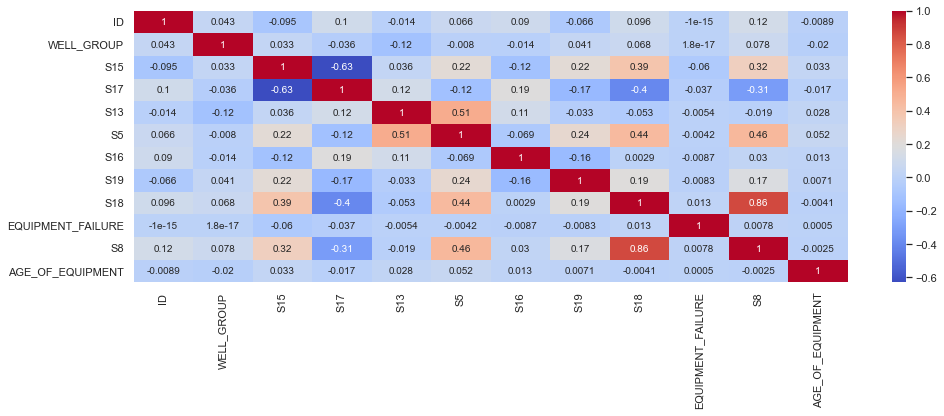

In [13]:
# Correlation between different variables
plt.figure(figsize = (16,5))
sns.heatmap(data.corr(method='pearson'),cmap='coolwarm',annot=True)

In [14]:
# Correlation between different dependent and independent variables
data.corr()['EQUIPMENT_FAILURE']

ID                  -1.002965e-15
WELL_GROUP           1.755806e-17
S15                 -5.997746e-02
S17                 -3.673575e-02
S13                 -5.387080e-03
S5                  -4.194914e-03
S16                 -8.667327e-03
S19                 -8.325554e-03
S18                  1.283648e-02
EQUIPMENT_FAILURE    1.000000e+00
S8                   7.830244e-03
AGE_OF_EQUIPMENT     4.989128e-04
Name: EQUIPMENT_FAILURE, dtype: float64

In [15]:
# given to small number of failures, we will visualize relations only 
failed_data = data[data['EQUIPMENT_FAILURE'] == 1]
failed_data

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
143,100001,4/24/15,G,O,Y,1,0.0,0.0,0.000000,0.000000,8.8924,0.90,170.4,1,0.000000,1023
1452,100003,11/22/16,C,L,T,1,0.0,0.0,0.000000,0.000000,8.7048,0.00,4.4,1,0.000000,1121
1974,100009,4/27/16,H,M,X,3,0.0,0.0,23.614483,7202.413793,3.2824,42.70,57.1,1,89.084138,832
2882,100014,10/21/16,H,M,S,2,0.0,0.0,24.680690,5257.103448,3.7310,25.50,43.1,1,45.019310,1449
2940,100017,12/18/14,E,K,T,2,0.0,0.0,29.906154,5233.307692,8.4132,0.10,678.0,1,1.092308,9996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146442,100599,8/1/15,H,K,R,1,0.0,0.0,24.995862,7623.862069,4.6543,12.63,341.2,1,357.989655,802
146961,100600,1/1/15,D,J,V,1,0.0,0.0,35.679130,4245.739130,6.8880,14.80,423.0,1,0.000000,1730
148128,100610,3/12/16,E,P,Z,4,0.0,0.0,44.325217,13519.347830,6.1952,0.90,1078.9,1,1128.495652,906
148921,100611,5/13/16,B,O,W,3,0.0,0.0,31.100000,6624.000000,6.2475,0.00,780.7,1,878.300000,3808


<AxesSubplot:xlabel='MAINTENANCE_VENDOR', ylabel='Count'>

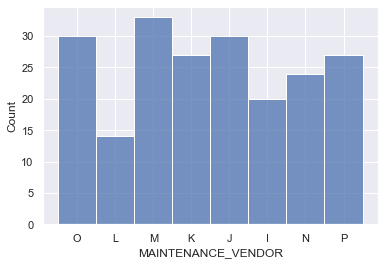

In [16]:
sns.histplot(failed_data, x='MAINTENANCE_VENDOR')

In [17]:
data['MAINTENANCE_VENDOR'].value_counts()

M    24123
O    21930
J    21930
K    19737
P    19737
N    17544
I    14620
L    10234
Name: MAINTENANCE_VENDOR, dtype: int64

In [18]:
failed_data['MAINTENANCE_VENDOR'].value_counts()

M    33
O    30
J    30
K    27
P    27
N    24
I    20
L    14
Name: MAINTENANCE_VENDOR, dtype: int64

In [19]:
failed_data['MAINTENANCE_VENDOR'].value_counts() / data['MAINTENANCE_VENDOR'].value_counts()

M    0.001368
O    0.001368
J    0.001368
K    0.001368
P    0.001368
N    0.001368
I    0.001368
L    0.001368
Name: MAINTENANCE_VENDOR, dtype: float64

## Feature Engineering

In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.head()

In [ ]:
# sort data based on ID and date
data = data.sort_values(by=['ID','DATE'], ascending=[True, True])

# create a new column called “switch” that indicates when the id changes
data['switch'] = np.where((data['ID'] != data['ID'].shift(1)), 1, 0)
data.head()

In [ ]:
# define a time window which is the number of days we will look backward into a time series of sensor values.
feature_window=21

dfx = data

# select the first record of each machine
starter = dfx[dfx['switch'] == 1]
starter = starter[['DATE','ID']]

#rename date to start_date
starter = starter.rename(index=str, columns={"DATE": "START_DATE"})

# Merge START_DATE to the original data set
dfx =dfx.merge(starter, on=['ID'], how='left')

# calculate the number of days since the beginning of each well. 
dfx['C'] = dfx['DATE'] - dfx['START_DATE']
dfx['TIME_SINCE_START'] = dfx['C'] / np.timedelta64(1, 'D')
dfx=dfx.drop(columns=['C'])
dfx['too_soon'] = np.where((dfx['TIME_SINCE_START'] < feature_window) , 1, 0)
dfx

In [ ]:
sensors = ['S15','S17','S13', 'S5', 'S16', 'S19', 'S18', 'S8']

In [ ]:
# running average for a certain time window
for sensor in sensors:
    for x in range(1, (feature_window+1)):
        namer=sensor+'_'+'mean'
        dfx[namer] = np.where((dfx['too_soon'] == 0),(dfx[sensor].rolling(min_periods=1, window=feature_window).mean()) , dfx[sensor])

In [ ]:
# running median for a certain time window
for sensor in sensors:
    for x in range(1, (feature_window+1)):
        namer=sensor+'_'+'median'
        dfx[namer] = np.where((dfx['too_soon'] == 0),(dfx[sensor].rolling(min_periods=1, window=feature_window).median()) , dfx[sensor])

In [ ]:
# running maximum for a certain time window
for sensor in sensors:
    for x in range(1, (feature_window+1)):
        namer=sensor+'_'+'max'
        dfx[namer] = np.where((dfx['too_soon'] == 0),(dfx[sensor].rolling(min_periods=1, window=feature_window).max()) , dfx[sensor])

In [ ]:
# running minimum for a certain time window
for sensor in sensors:
    for x in range(1, (feature_window+1)):
        namer=sensor+'_'+'min'
        dfx[namer] = np.where((dfx['too_soon'] == 0),(dfx[sensor].rolling(min_periods=1, window=feature_window).min()) , dfx[sensor])

In [ ]:
# indicate failed data
failed_data['ID']

In [ ]:
d=dfx[dfx['ID']==100003]

x1=d['DATE']
y1=d['S15']
y2=d['S15_mean']
y3=d['S15_max']
y4=d['S15_min']

trace1 = go.Scatter(
    x=x1,
    y=y1,
    name='S15'
)
trace2 = go.Scatter(
    x=x1,
    y=y2,
    name='Day Mean'
)
trace3 = go.Scatter(
    x=x1,
    y=y4,
    name='Day Min'
)

trace4 = go.Scatter(
    x=x1,
    y=y3,
    name='Day Max'
)
trace5 = go.Scatter(
    x=d[d['EQUIPMENT_FAILURE'] == 1]['DATE'],
    y=d['S15'],
    marker=dict(
            color='Green',
            size=10
        ),
    name='Failed'
)

data = [trace1,trace2,trace3,trace4, trace5]
layout = go.Layout(
    title='S15 and Summaries',
    yaxis=dict(
        title='S15'
    ),
        xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
))
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='shapes-lines')

In [ ]:
d=dfx[dfx['ID']==100612]

x1=d['DATE']
y1=d['S15']
y2=d['S15_mean']
y3=d['S15_max']
y4=d['S15_min']

trace1 = go.Scatter(
    x=x1,
    y=y1,
    name='S15'
)
trace2 = go.Scatter(
    x=x1,
    y=y2,
    name='Day Mean'
)
trace3 = go.Scatter(
    x=x1,
    y=y4,
    name='Day Min'
)

trace4 = go.Scatter(
    x=x1,
    y=y3,
    name='Day Max'
)
trace3 = go.Scatter(
    x=d[d['EQUIPMENT_FAILURE'] == 1]['DATE'],
    y=d['S15'],
    marker=dict(
            color='Green',
            size=10
        ),
    name='Failed'
)

data = [trace1,trace2,trace3,trace4,trace5]
layout = go.Layout(
    title='S15 and Summaries',
    yaxis=dict(
        title='S15'
    ),
        xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
))
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='shapes-lines')

In [ ]:
# find sudden spikes in sensor values
dfx['S15_chg'] = np.where((dfx.S15_mean==0),0 , dfx.S15/dfx.S15_mean)
dfx['S17_chg'] = np.where((dfx.S17_mean == 0),0 , dfx.S17/dfx.S17_mean)
dfx['S13_chg'] = np.where((dfx.S13_mean == 0),0 , dfx.S13/dfx.S13_mean)
dfx['S5_chg'] = np.where((dfx.S5_mean == 0),0 , dfx.S5/dfx.S5_mean)
dfx['S16_chg'] = np.where((dfx.S16_mean == 0),0 , dfx.S16/dfx.S16_mean)
dfx['S19_chg'] = np.where((dfx.S19_mean == 0),0 , dfx.S19/dfx.S19_mean)
dfx['S18_chg'] = np.where((dfx.S18_mean == 0),0 , dfx.S18/dfx.S18_mean)
dfx['S8_chg'] = np.where((dfx.S8_mean == 0),0 , dfx.S8/dfx.S8_mean)


In [ ]:
#copy the data set to a more convenient name 
data = dfx

In [ ]:
# convert the categorical variables into binary dummy variables.
df_dv = pd.get_dummies(data['REGION_CLUSTER'])
df_dv = df_dv.rename(columns={"A": "CLUSTER_A","B":"CLUSTER_B","C":"CLUSTER_C","D":"CLUSTER_D","E":"CLUSTER_E","F":"CLUSTER_F","G":"CLUSTER_G","H":"CLUSTER_H"})
data = pd.concat([data, df_dv], axis=1)

df_dv = pd.get_dummies(data['MAINTENANCE_VENDOR'])
df_dv = df_dv.rename(columns={"I": "MV_I","J":"MV_J","K":"MV_K","L":"MV_L","M":"MV_M","N":"MV_N","O":"MV_O","P":"MV_P"})
data = pd.concat([data, df_dv], axis=1)

df_dv = pd.get_dummies(data['MANUFACTURER'])
df_dv = df_dv.rename(columns={"Q": "MN_Q","R":"MN_R","S":"MN_S","T":"MN_T","U":"MN_U","V":"MN_V","W":"MN_W","X":"MN_X","Y":"MN_Y","Z":"MN_Z"})
data = pd.concat([data, df_dv], axis=1)

df_dv = pd.get_dummies(data['WELL_GROUP'])
df_dv = df_dv.rename(columns={1: "WG_1",2:"WG_2",3:"WG_3",4:"WG_4",5:"WG_5",6:"WG_6",7:"WG_7",8:"WG_8"})
data = pd.concat([data, df_dv], axis=1)

# Remove the newly redundant categorical variables.  This are now represented by dummy variables.
data = data.drop(columns=['REGION_CLUSTER','MAINTENANCE_VENDOR','MANUFACTURER','WELL_GROUP'])

In [ ]:
data.head()

In [ ]:
# Because machines are designed to have a long service life time, we typically do not have many examples of failure. This means the data sets we use in PM are almost always unbalanced.
target_window=28

# sort data based on ID and date
data=data.sort_values(by=['ID', 'DATE'], ascending=[True, True])
data.reset_index(level=0, inplace=True)

In [ ]:
# Create a new data frame that contains the failure records.
df_failure=data[data['EQUIPMENT_FAILURE'] == 1]

df_failure=df_failure[['DATE','ID']]

df_failure=df_failure.rename(index=str, columns={"DATE": "FAILURE_DATE"})

data=data.sort_values(by=['ID'], ascending=[True])
df_failure=df_failure.sort_values(by=['ID'], ascending=[True])

# Append the FAILURE_DATE to each ID.
data = data.merge(df_failure, on=['ID'], how='left')

In [ ]:
# For each record, calculate the number of days until failure.
data=data.sort_values(by=['ID','DATE'], ascending=[True, True])

data['FAILURE_DATE'] = pd.to_datetime(data['FAILURE_DATE'])
data['DATE'] = pd.to_datetime(data['DATE'])
data['C'] = data['FAILURE_DATE'] - data['DATE']

data['TIME_TO_FAILURE'] = data['C'] / np.timedelta64(1, 'D')

In [ ]:
# Clean up and sort the records by ID and DATE
data = data.drop(columns=['index'])
data = data.sort_values(by=['ID', 'DATE'], ascending=[True, True])
data.reset_index(inplace=True)

In [ ]:
# Create a new variable, FAILURE_TARGET. It is equal to 1 if the record proceeds a failure by "failure_window" days or less.
data['FAILURE_TARGET'] = np.where(((data.TIME_TO_FAILURE < target_window) & ((data.TIME_TO_FAILURE>=0))), 1, 0)

In [ ]:
data.head()

In [ ]:
data.groupby(['FAILURE_TARGET'])['S5'].count()

In [ ]:
# The new field occurs about 4% of the time. But the data set is still very unballanced
data['FAILURE_TARGET'].mean()

In [ ]:
data.drop(columns=['DATE','C','switch','START_DATE','FAILURE_DATE'])

In [ ]:
data.head()

In [ ]:
data.to_pickle("data.pkl")